In [54]:
import csv
import matplotlib.pyplot as plt
import string
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)

In [2]:
print("Reading data..." )    
        
with open('questions.csv') as csvfile:
    reader = csv.reader(csvfile)
    keys = next(reader)
    data = [row for row in reader]  
    
print("done")

Reading data...
done


In [3]:
#indexes for values in data
pid = 0
qid1 = 1
qid2 = 2
q1 = 3
q2 = 4
dup = 5

In [60]:
# label distribution
print("%d duplicates"%sum([1 for d in data if d[dup] == '1']))
print("%d non-duplicates"%sum([1 for d in data if d[dup] == '0']))

149306 duplicates
255045 non-duplicates


In [4]:
# remove punctuation and ignore case
punctuation = set(string.punctuation)
for i in range(len(data)):
    data[i][q1] =''.join([c for c in data[i][q1].lower() if not c in punctuation])
    data[i][q2] =''.join([c for c in data[i][q2].lower() if not c in punctuation])

In [5]:
question_count = {} # maps qid to count
uniq_questions = [] # list of unique questions strings

for d in data:
    
    if d[qid1] in question_count:
        question_count[d[qid1]] += 1
    else:
        question_count[d[qid1]] = 1
        uniq_questions.append(d[q1])
        
    if d[qid2] in question_count:
        question_count[d[qid2]] += 1
    else:
        question_count[d[qid2]] = 1
        uniq_questions.append(d[q2])

In [9]:
#unique question word length
question_lengths = [len(q) for q in uniq_questions]
print("unique question lengths")
print("\tmin = %s"%min(question_lengths))
print("\tmax = %s"%max(question_lengths))
print("\tmean = %s"%(float(sum(question_lengths))/len(question_lengths)))


unique question lengths
	min = 0
	max = 1130
	mean = 58.3382611569


In [10]:
print('unique questions: %d'%len(question_count))
print('questions used more than once: %d'%sum([1 if question_count[q] > 1 else 0 for q in question_count]))

print('')

for i in range(1,10):
    print('questions used %d times: %d'%(i, sum([1 if question_count[q] == i else 0 for q in question_count])))
print('...')

print('')



unique questions: 789801
questions used more than once: 13698

questions used 1 times: 776103
questions used 2 times: 11135
questions used 3 times: 1591
questions used 4 times: 455
questions used 5 times: 213
questions used 6 times: 117
questions used 7 times: 55
questions used 8 times: 31
questions used 9 times: 33
...



In [22]:
def vectorize_string(s):
    '''
    turns a string into a dictionary of (substrings of len p). 
    Can be used as a 'vector' where noexistant keys have val 0
    
    Each (substrings of len p) maps to the amount of appearances
    of itself in the original string
    '''
    
    v = {}
    for word in s.split():
        if word in v:
            v[word] += 1
        else:
            v[word] = 1
            
    return v


def magnitude_dict(data):
    '''
    Evaulats the magnitude of a dict
    '''
    
    return sum([value**2 for value in data.values()])**.5


def dot_dicts(d1,d2):
    '''
    multiplies the values of the overlaping keys
    in two dictionaries.  It chooses to iterate
    over the smaller and lookup in the larger
    '''
    
    a = d1 if len(d1) < len(d2) else d2
    b = d2 if len(d1) < len(d2) else d1
    
    dot = 0
    # a is shorter than b
    for s in a:
        if s in b:
            dot += a[s]*b[s]
            
    return dot
    
def cosine_simularity_string(s1,s2):
    '''
    returns the cosine simularity of two strings
    words in each string are considered dimensions
    '''
    
    d1 = vectorize_string(s1)
    d2 = vectorize_string(s2)
    return dot_dicts(d1,d2)/(magnitude_dict(d1)*magnitude_dict(d2))
    

In [31]:
data_no_empty = [d for d in data if d[q1] != '' and d[q2] != '']
cs_all = [cosine_simularity_string(d[q1], d[q2]) for d in data_no_empty]

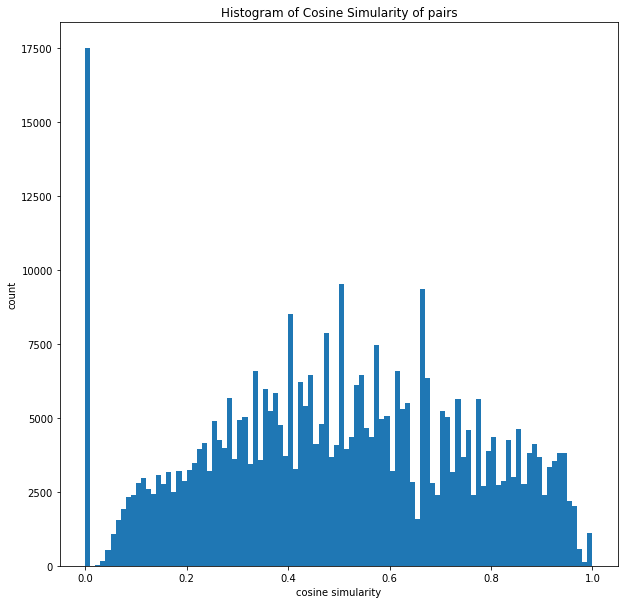

In [68]:
plt.title('Histogram of Cosine Simularity of pairs')
plt.xlabel('cosine simularity')
plt.ylabel('count')
bins = np.arange(0,1.01,.01)
plt.hist(cs_all, bins=bins)
plt.show()

In [43]:
count = 0
for d in data_no_empty:
    if d[q1] == d[q2]:
        count += int(d[dup])
print ("%d pairs of questions are exactly the same when case and puncuation is removed"%count)

559 pairs of questions are exactly the same when case and puncuation is removed


In [52]:
cs_all_dup = [cosine_simularity_string(d[q1], d[q2]) for d in data_no_empty if d[dup] == '1']
cs_all_non = [cosine_simularity_string(d[q1], d[q2]) for d in data_no_empty if d[dup] == '0']

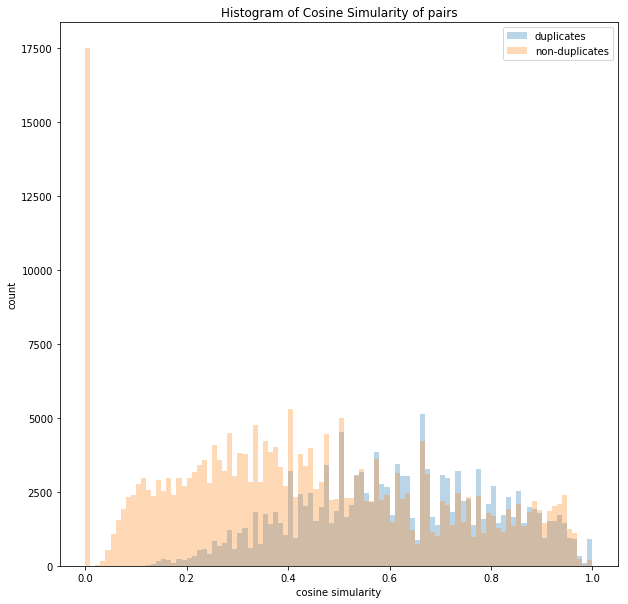

In [64]:
plt.title('Histogram of Cosine Simularity of pairs')
plt.xlabel('cosine simularity')
plt.ylabel('count')

plt.hist(cs_all_dup, bins=bins, alpha=0.3, label='duplicates')
plt.hist(cs_all_non, bins=bins, alpha=0.3, label='non-duplicates')
plt.legend(loc='best')
plt.show()